In [1]:
try:
    import tinygp
except ModuleNotFoundError:
    %pip install -qqq tinygp
    import tinygp
kernels = tinygp.kernels
from tinygp import GaussianProcess

try:
    import jax
except:
    %pip install jax

import jax.numpy as jnp

try:
    import matplotlib.pyplot as plt
except:
    %pip install matplotlib
    import matplotlib.pyplot as plt

try:
    import seaborn as sns
except:
    %pip install seaborn
    import seaborn as sns

In [2]:
import os

dev_mode = "DEV_MODE" in os.environ

if dev_mode:
    import sys

    sys.path.append("scripts")
    import pyprobml_utils as pml
    from latexify import latexify
    latexify(width_scale_factor=4.5, fig_height=3)

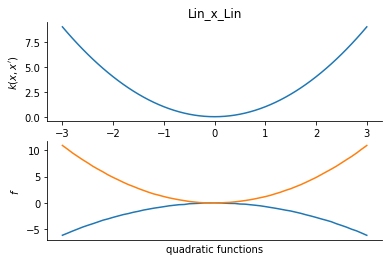

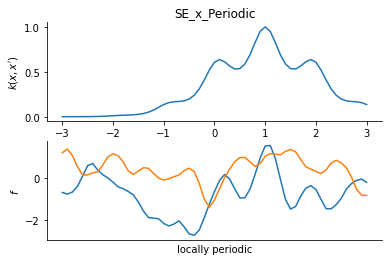

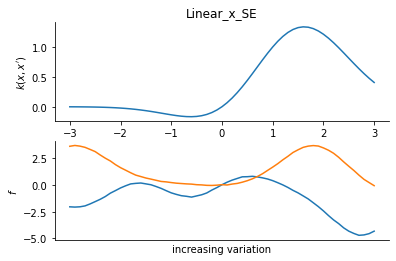

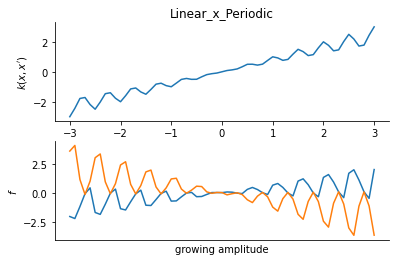

In [3]:
def plot_sample(kernel, save_name, functions):
    fig, ax = plt.subplots(2, 1)

    # Plot kernel
    x2 = jnp.array([1.0]).reshape(-1,1)
    kernel_values = kernel(x, x2)
    ax[0].plot(x.ravel(), kernel_values.ravel())
    ax[0].set_title(save_name.replace('.pdf',''))
    ax[0].set_xlabel("$x$ (with $x' = 1$)")
#     if 'Lin_x_Lin' in save_name:
#         ax[0].set_ylabel("$k(x, x')$")

    # Plot samples
    gp = GaussianProcess(kernel, x)
    samples = gp.sample(key, (2,))
    for sample in samples:
        ax[1].plot(x, sample)
#     ax[1].set_title('Samples');
    ax[1].set_xlabel(functions)
#     if 'Lin_x_Lin' in save_name:
#         ax[1].set_ylabel("$f$")
    ax[1].set_xticks([])
    sns.despine()
    if dev_mode:
#         plt.tight_layout()
        pml.savefig(save_name)


x = jnp.arange(-3.0, 3.1, 0.1).reshape(-1,1)
N = len(x)

key = jax.random.PRNGKey(4)

kernel = kernels.Polynomial(order=2)
plot_sample(kernel, save_name="Lin_x_Lin.pdf", functions='quadratic functions')

kernel = kernels.ExpSineSquared(scale=1.0, gamma=0.5) * kernels.ExpSquared(scale=1.0)
plot_sample(kernel, save_name="SE_x_Periodic.pdf", functions='locally periodic')

kernel = kernels.Polynomial(order=1) * kernels.ExpSquared(scale=1.0)
plot_sample(kernel, save_name="Linear_x_SE.pdf", functions='increasing variation')

kernel = kernels.Polynomial(order=1) * kernels.ExpSineSquared(scale=0.5, gamma=0.5)
plot_sample(kernel, save_name="Linear_x_Periodic.pdf", functions='growing amplitude')